<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/CV-2025/blob/main/Week_12/Hands_on_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-Shot Image Recognition with CLIP

**Implementation** Note:  
This notebook was developed using methodologies suggested by  
the DeepSeek-V3 language model (DeepSeek, 2024).

In [2]:
# Install required libraries
!pip install -q transformers torch pillow requests

In [3]:
import torch
from PIL import Image
import requests
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

from transformers import CLIPProcessor, CLIPModel

In [4]:
# Initialize model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

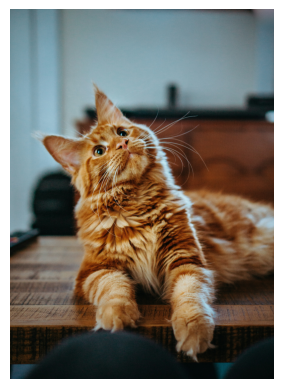

In [5]:
#@title Image Input Options {run: "auto"}
input_method = "URL" #@param ["URL", "Upload"]

if input_method == "URL":
    # Use example image or paste your own URL
    url = "https://images.unsplash.com/photo-1573865526739-10659fec78a5"  # Cat image
    image = Image.open(requests.get(url, stream=True).raw)
else:
    # Upload custom image
    from google.colab import files
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    image = Image.open(file_name)

# Display the image
plt.imshow(np.array(image))
plt.axis('off')
plt.show()

In [6]:
#@title Enter Candidate Labels {run: "auto"}
# Customize these labels for your use case
labels = ["cat", "dog", "wild animal", "car", "computer", "coffee mug"] #@param

# Add prompt engineering for better results (CLIP benefits from this)
processed_labels = [f"a photo of a {label}" for label in labels]

In [7]:
# Process inputs and get predictions
inputs = processor(
    text=processed_labels,
    images=image,
    return_tensors="pt",
    padding=True
)

with torch.no_grad():
    outputs = model(**inputs)

# Calculate probabilities
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1).numpy()


Prediction probabilities:
cat            : 98.02%
dog            : 1.09%
wild animal    : 0.70%
car            : 0.01%
computer       : 0.06%
coffee mug     : 0.12%

Predicted label: cat


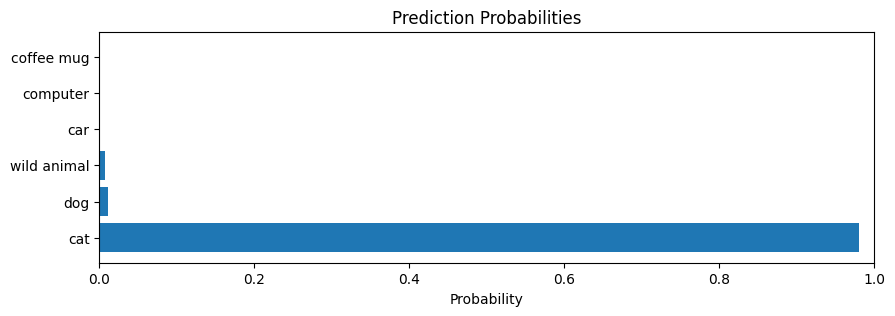

In [8]:
# Display results
print("\nPrediction probabilities:")
for label, prob in zip(labels, probs[0]):
    print(f"{label:<15}: {prob:.2%}")

predicted_label = labels[probs.argmax()]
print(f"\nPredicted label: {predicted_label}")

# Visualize probabilities
plt.figure(figsize=(10, 3))
plt.barh(labels, probs[0])
plt.title('Prediction Probabilities')
plt.xlabel('Probability')
plt.xlim([0, 1])
plt.show()